In [1]:
import numpy as np
from scipy import misc
from PIL import Image
import glob
import matplotlib.pyplot as plt
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
from IPython.display import SVG
import cv2
import seaborn as sn  
import pandas as pd  
import pickle  
from keras import layers  
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout  
from keras.models import Sequential, Model, load_model  
from keras.preprocessing import image  
from keras.preprocessing.image import load_img  
from keras.preprocessing.image import img_to_array  
from keras.applications.imagenet_utils import decode_predictions  
from keras.utils import layer_utils, np_utils  
from keras.utils.data_utils import get_file  
from keras.applications.imagenet_utils import preprocess_input  
from keras.utils.vis_utils import model_to_dot  
from keras.utils import plot_model  
from keras.initializers import glorot_uniform  
from keras import losses  
import keras.backend as K  
from keras.callbacks import ModelCheckpoint  
from sklearn.metrics import confusion_matrix, classification_report  
import tensorflow as tf

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar100
(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

In [3]:
x_train_original.shape

(50000, 32, 32, 3)

In [4]:
x_test_original.shape

(10000, 32, 32, 3)

In [8]:
y_train_original.shape

(50000, 1)

In [9]:
y_test_original.shape

(10000, 1)

In [10]:
y_train_original[10]

array([39])

In [11]:
y_train = np_utils.to_categorical(y_train_original, 100)
y_test = np_utils.to_categorical(y_test_original, 100)

In [12]:
y_train.shape

(50000, 100)

In [33]:
y_train.shape

(50000, 100)

In [34]:
y_test.shape

(10000, 100)

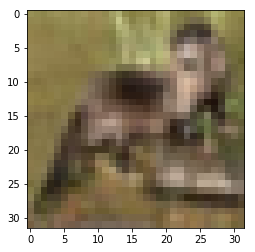

In [9]:
imgplot = plt.imshow(x_train_original[100])
plt.show()

In [10]:
x_train = x_train_original / 255
x_test = x_test_original / 255

In [40]:
x_train.shape

(50000, 32, 32, 3)

In [41]:
x_test.shape

(10000, 32, 32, 3)

In [43]:
K.set_image_data_format('channels_last')

In [44]:
K.set_learning_phase(1)

In [45]:
def create_simple_nn():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3), name="Input_layer"))
    model.add(Dense(1000, activation='relu', name="Hidden_layer_1"))
    model.add(Dense(500, activation='relu', name="Hidden_layer_2"))
    model.add(Dense(100, activation='softmax', name="Output_layer"))
    return model

In [46]:
snn_model = create_simple_nn()  
snn_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])

In [47]:
snn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Flatten)        (None, 3072)              0         
_________________________________________________________________
Hidden_layer_1 (Dense)       (None, 1000)              3073000   
_________________________________________________________________
Hidden_layer_2 (Dense)       (None, 500)               500500    
_________________________________________________________________
Output_layer (Dense)         (None, 100)               50100     
Total params: 3,623,600
Trainable params: 3,623,600
Non-trainable params: 0
_________________________________________________________________


In [48]:
snn = snn_model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 35s 710us/step - loss: 4.1672 - acc: 0.0731 - mean_squared_error: 0.0097 - val_loss: 3.9582 - val_acc: 0.1026 - val_mean_squared_error: 0.0096
Epoch 2/10
50000/50000 [==============================] - 36s 713us/step - loss: 3.7945 - acc: 0.1305 - mean_squared_error: 0.0095 - val_loss: 3.7225 - val_acc: 0.1493 - val_mean_squared_error: 0.0094
Epoch 3/10
50000/50000 [==============================] - 36s 710us/step - loss: 3.6330 - acc: 0.1556 - mean_squared_error: 0.0093 - val_loss: 3.6646 - val_acc: 0.1540 - val_mean_squared_error: 0.0093
Epoch 4/10
50000/50000 [==============================] - 35s 700us/step - loss: 3.5288 - acc: 0.1785 - mean_squared_error: 0.0092 - val_loss: 3.5866 - val_acc: 0.1663 - val_mean_squared_error: 0.0092
Epoch 5/10
50000/50000 [==============================] - 35s 697us/step - loss: 3.4453 - acc: 0.1910 - mean_squared_error: 0.0091 - val_loss: 3.5

In [49]:
evaluation = snn_model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1)  
evaluation

10000/10000 [==============================] - 1s 106us/step


[3.3174314178466795, 0.2178, 0.008883508443832398]

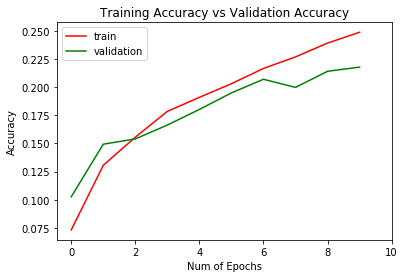

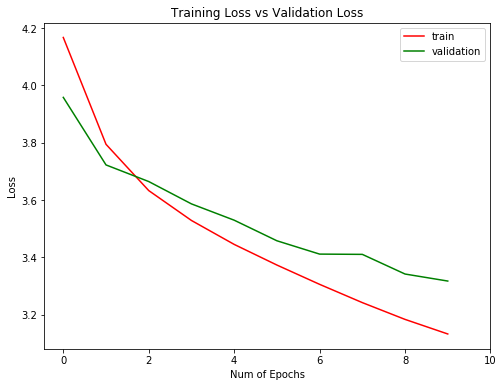

In [50]:
plt.figure(0)  
plt.plot(snn.history['acc'],'r')  
plt.plot(snn.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(snn.history['loss'],'r')  
plt.plot(snn.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()

In [51]:
snn_pred = snn_model.predict(x_test, batch_size=32, verbose=1)  
snn_predicted = np.argmax(snn_pred, axis=1)

10000/10000 [==============================] - 1s 100us/step


In [66]:
snn_predicted

array([12, 74, 90, ..., 18, 74,  0], dtype=int64)

In [61]:
np.argmax(y_test, axis=1)

array([49, 33, 72, ..., 51, 42, 70], dtype=int64)

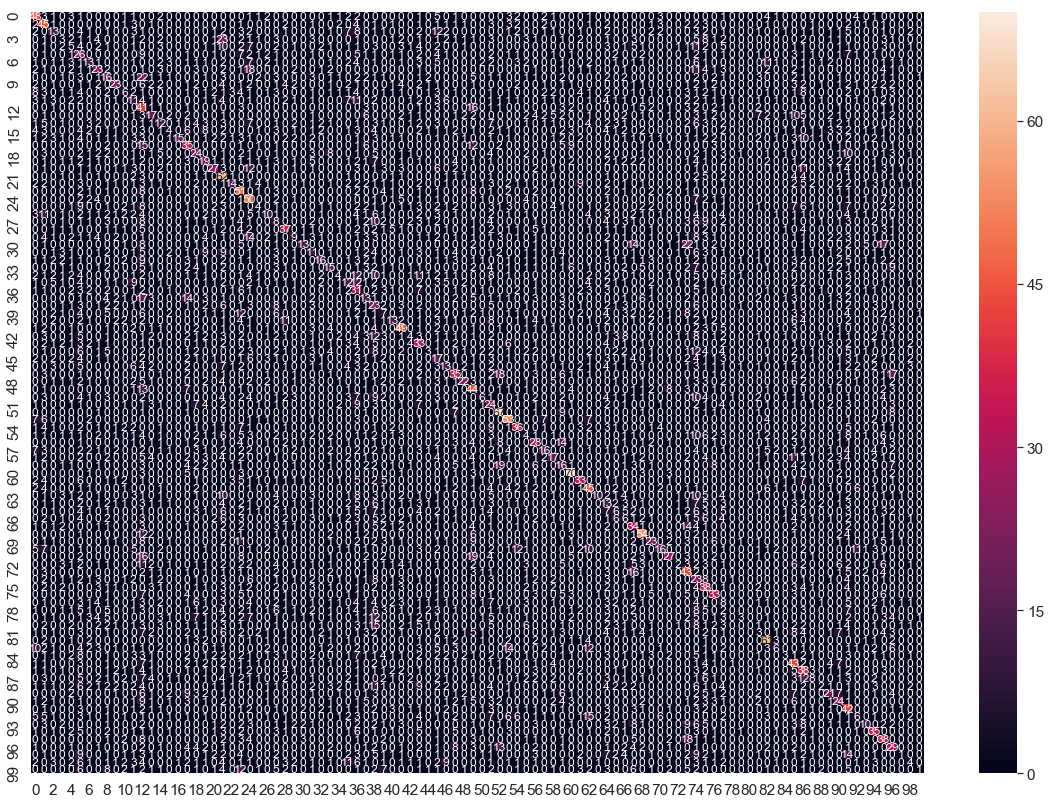

In [52]:
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(y_test, axis=1), snn_predicted)

#Visualizamos la matriz de confusión
snn_df_cm = pd.DataFrame(snn_cm, range(100), range(100))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()

In [53]:
snn_report = classification_report(np.argmax(y_test, axis=1), snn_predicted)  
print(snn_report)

              precision    recall  f1-score   support

           0       0.34      0.48      0.40       100
           1       0.25      0.45      0.32       100
           2       0.21      0.13      0.16       100
           3       0.07      0.03      0.04       100
           4       0.08      0.05      0.06       100
           5       0.11      0.26      0.15       100
           6       0.22      0.13      0.16       100
           7       0.26      0.23      0.24       100
           8       0.14      0.16      0.15       100
           9       0.42      0.23      0.30       100
          10       0.15      0.06      0.09       100
          11       0.12      0.11      0.11       100
          12       0.10      0.41      0.16       100
          13       0.25      0.17      0.20       100
          14       0.18      0.12      0.14       100
          15       0.13      0.04      0.06       100
          16       0.83      0.15      0.25       100
          17       0.25    

C:\Users\Michael\Anaconda3\envs\Python_3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Michael\Anaconda3\envs\Python_3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Michael\Anaconda3\envs\Python_3.6\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


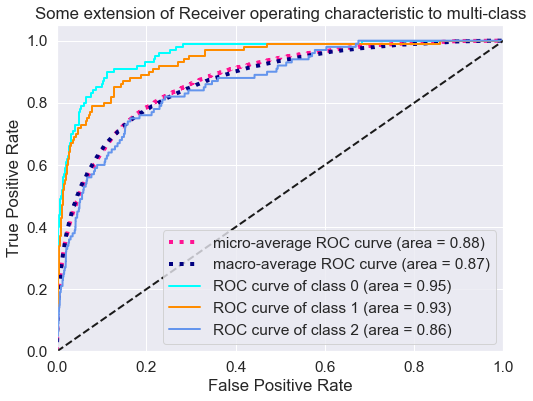

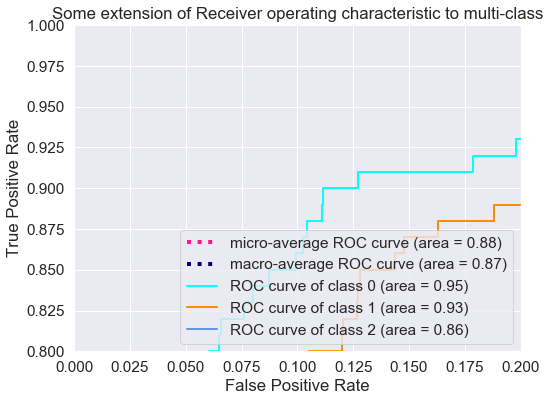

In [54]:
from sklearn.datasets import make_classification  
from sklearn.preprocessing import label_binarize  
from scipy import interp  
from itertools import cycle

n_classes = 100

from sklearn.metrics import roc_curve, auc

#Plot linewidth.
lw = 2

#Compute ROC curve and ROC area for each class
fpr = dict()  
tpr = dict()  
roc_auc = dict()  
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], snn_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), snn_pred.ravel())  
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)  
for i in range(n_classes):  
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr  
tpr["macro"] = mean_tpr  
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(n_classes-97), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)  
plt.xlim(0, 0.2)  
plt.ylim(0.8, 1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(3), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()

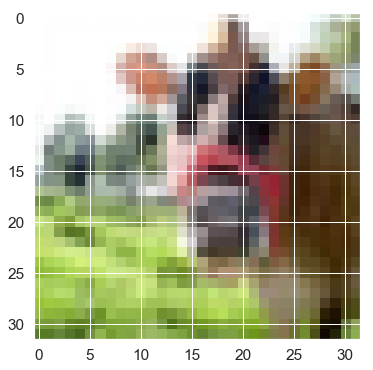

class for image 1: 49
predicted:         12


In [55]:
imgplot = plt.imshow(x_train_original[0])  
plt.show()  
print('class for image 1: ' + str(np.argmax(y_test[0])))  
print('predicted:         ' + str(snn_predicted[0]))

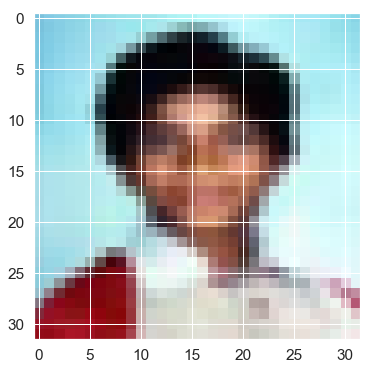

class for image 3: 51
predicted:         10


In [56]:
imgplot = plt.imshow(x_train_original[3])  
plt.show()  
print('class for image 3: ' + str(np.argmax(y_test[3])))  
print('predicted:         ' + str(snn_predicted[3]))

https://enmilocalfunciona.io/deep-learning-basico-con-keras-parte-1/